Import and prepare the data

In [1]:
import pandas as pd

In [2]:
credit = pd.read_csv('credit data.csv')

In [3]:
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
credit.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [6]:
import matplotlib.pyplot as plt

In [7]:
header = credit.dtypes.index
print(header)

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')


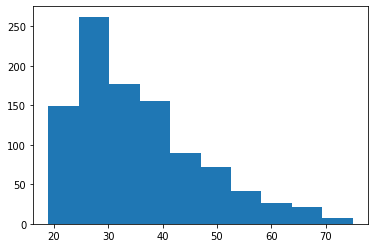

In [8]:
plt.hist(credit['Age'])
plt.show()

(array([483., 349., 123.,  45.]),
 array([19., 33., 47., 61., 75.]),
 <a list of 4 Patch objects>)

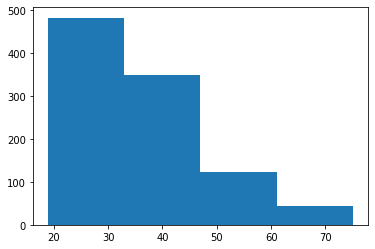

In [9]:
plt.hist(credit['Age'], bins=4)

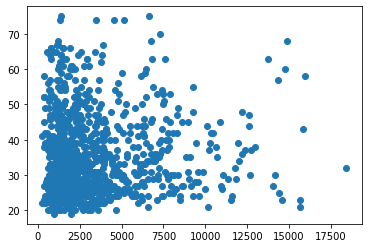

In [10]:
plt.scatter(credit['Credit amount'],credit['Age'])
plt.show()

In [11]:
corrMat = credit.corr()
print(corrMat)

                    Age       Job  Credit amount  Duration
Age            1.000000  0.015673       0.032716 -0.036136
Job            0.015673  1.000000       0.285385  0.210910
Credit amount  0.032716  0.285385       1.000000  0.624984
Duration      -0.036136  0.210910       0.624984  1.000000


In [12]:
covMat = credit.cov()
print(covMat)

                       Age         Job  Credit amount      Duration
Age             129.401285    0.116533   1.050523e+03     -4.956995
Job               0.116533    0.427211   5.265303e+02      1.662350
Credit amount  1050.522655  526.530298   7.967843e+06  21273.749776
Duration         -4.956995    1.662350   2.127375e+04    145.415006


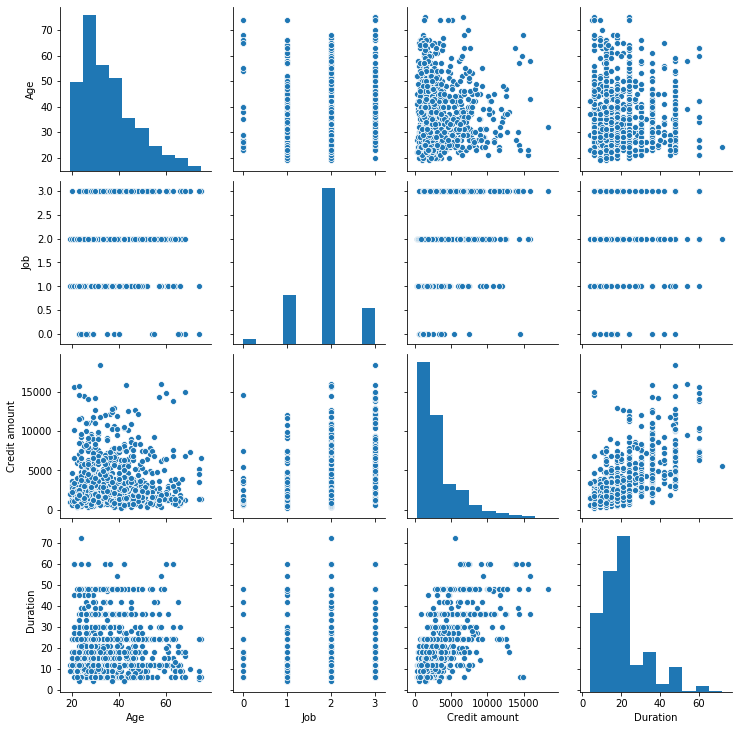

In [13]:
import seaborn as sns
sns.pairplot(credit)

Preprocess the data set

In [14]:
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [15]:
credit['Saving accounts'] = credit['Saving accounts'].map({"little":0,"moderate":1,"quite rich":2 ,"rich":3 });
    

In [16]:
credit['Saving accounts'] = credit['Saving accounts'].fillna(credit['Saving accounts'].dropna().mean())

In [17]:
credit['Checking account'] = credit['Checking account'].map({"little":0,"moderate":1,"rich":2 });


In [18]:
credit['Checking account'] = credit['Checking account'].fillna(credit['Checking account'].dropna().mean())

In [19]:
credit['Sex'] = credit['Sex'].map({"male":0,"female":1}).astype(float);

In [20]:
credit['Housing'] = credit['Housing'].map({"own":0,"free":1,"rent":2}).astype(float);

In [21]:
credit['Purpose'] = credit['Purpose'].map({'radio/TV':0, 'education':1, 'furniture/equipment':2, 'car':3, 'business':4,
       'domestic appliances':5, 'repairs':6, 'vacation/others':7}).astype(float);

In [22]:
credit['Risk'] = credit['Risk'].map({"good":1,"bad":0}).astype(float);

In [23]:
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,0.0,2,0.0,0.456548,0.000000,1169,6,0.0,1.0
1,22,1.0,2,0.0,0.000000,1.000000,5951,48,0.0,0.0
2,49,0.0,1,0.0,0.000000,0.651815,2096,12,1.0,1.0
3,45,0.0,2,1.0,0.000000,0.000000,7882,42,2.0,1.0
4,53,0.0,2,1.0,0.000000,0.000000,4870,24,3.0,0.0


In [24]:
import numpy as np
corr_matrix  = credit.corr()
np.zeros_like(corr_matrix)
np.zeros_like(corr_matrix, dtype=np.bool) 
mask = np.zeros_like(corr_matrix, dtype=np.bool)

np.triu_indices_from(mask) 
mask[np.triu_indices_from(mask)]= True
corr_matrix.style.background_gradient(cmap='coolwarm')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
Age,1.000000,-0.161694,0.015673,-0.108437,0.033657,0.006755,0.032716,-0.036136,0.071069,0.091127
Sex,-0.161694,1.000000,-0.070298,0.179137,0.005069,-0.001904,-0.093482,-0.081432,-0.051436,-0.075493
Job,0.015673,-0.070298,1.000000,0.015201,-0.028725,-0.018230,0.285385,0.210910,0.024629,-0.032735
Housing,-0.108437,0.179137,0.015201,1.000000,-0.001403,-0.085714,0.056119,0.011950,0.041964,-0.123815
Saving accounts,0.033657,0.005069,-0.028725,-0.001403,1.000000,0.106671,-0.055923,-0.028352,0.021677,0.134367
Checking account,0.006755,-0.001904,-0.018230,-0.085714,0.106671,1.000000,-0.016315,-0.034477,-0.055309,0.138411
Credit amount,0.032716,-0.093482,0.285385,0.056119,-0.055923,-0.016315,1.000000,0.624984,0.214513,-0.154739
Duration,-0.036136,-0.081432,0.210910,0.011950,-0.028352,-0.034477,0.624984,1.000000,0.105524,-0.214927
Purpose,0.071069,-0.051436,0.024629,0.041964,0.021677,-0.055309,0.214513,0.105524,1.000000,-0.090001
Risk,0.091127,-0.075493,-0.032735,-0.123815,0.134367,0.138411,-0.154739,-0.214927,-0.090001,1.000000


PCA

In [25]:
from sklearn.cluster import KMeans;
from sklearn.decomposition import PCA; 
from sklearn.preprocessing import normalize;
y = KMeans().fit_predict(credit)
X_norm = normalize(credit);
y_PCA = PCA(n_components=2).fit_transform(X_norm,2);
y_PCA.shape

(1000, 2)

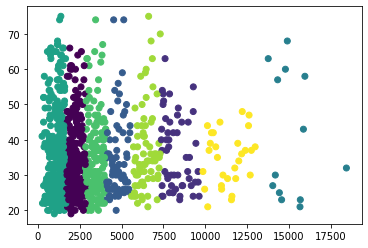

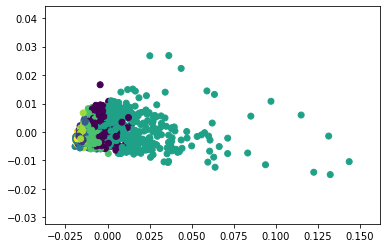

In [26]:
plt.scatter(credit['Credit amount'],credit['Age'],c=y)
plt.figure()
plt.scatter(y_PCA[:,0],y_PCA[:,1],c=y)

Selecting the data

In [27]:
#features
features = credit.iloc[:,1:9]
print('Summary of feature sample')
features.head()

Summary of feature sample


,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0.0,2,0.0,0.456548,0.000000,1169,6,0.0
1,1.0,2,0.0,0.000000,1.000000,5951,48,0.0
2,0.0,1,0.0,0.000000,0.651815,2096,12,1.0
3,0.0,2,1.0,0.000000,0.000000,7882,42,2.0
4,0.0,2,1.0,0.000000,0.000000,4870,24,3.0


In [28]:
#dependent variable
depVar = credit['Risk']

In [29]:
#Training Set (Feature Space: X Training)
X_train = (features[: 750])
X_train.head()

,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0.0,2,0.0,0.456548,0.000000,1169,6,0.0
1,1.0,2,0.0,0.000000,1.000000,5951,48,0.0
2,0.0,1,0.0,0.000000,0.651815,2096,12,1.0
3,0.0,2,1.0,0.000000,0.000000,7882,42,2.0
4,0.0,2,1.0,0.000000,0.000000,4870,24,3.0


In [30]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 750]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 750


0    1.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: Risk, dtype: float64

In [31]:
#Testing Set (X Testing)
X_test = features[-250:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 250
     Sex  Job  Housing  Saving accounts  Checking account  Credit amount  \
750  1.0    2      0.0              0.0          0.000000            428   
751  1.0    1      0.0              0.0          0.000000            976   
752  1.0    1      2.0              1.0          1.000000            841   
753  1.0    2      0.0              0.0          0.651815           5771   
754  0.0    2      1.0              3.0          0.651815           1555   

     Duration  Purpose  
750         6      2.0  
751        18      3.0  
752        12      4.0  
753        30      0.0  
754        12      6.0  


In [32]:
#Ground Truth (y_test) 
y_test = depVar[-250:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 250


750    1.0
751    0.0
752    1.0
753    1.0
754    0.0
Name: Risk, dtype: float64

Models


In [33]:
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [34]:
#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingClassifier


In [35]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [36]:
#cross validation
from sklearn.model_selection import train_test_split

In [37]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()
modelGB = GradientBoostingClassifier()

In [38]:
modelRF.fit(X_train,y_train)
modelSVR.fit(X_train,y_train)
modelLR.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
print(cross_val_score(modelRF, X_train, y_train)) 

[ 0.05192896  0.08043577  0.11497427  0.06743241 -0.04077237]


In [40]:
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[ 0.01812246  0.10830689  0.13097449  0.08872593 -0.06098976]


0.8696490414479114

In [41]:
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

[ 0.000629   -0.11766543 -0.10061025 -0.26306209 -0.24770503]


-0.13546370442754907

In [42]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[0.09706272 0.0607055  0.03905214 0.0620993  0.01292877]


0.08830344326130724

In [43]:
modelGB.fit(X_train,y_train)
print(cross_val_score(modelGB, X_train, y_train)) 
modelGB.score(X_train,y_train)

[0.76       0.71333333 0.76666667 0.75333333 0.78      ]


0.8613333333333333

Test the MODEL

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [45]:
#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.124
RMSE: 0.432


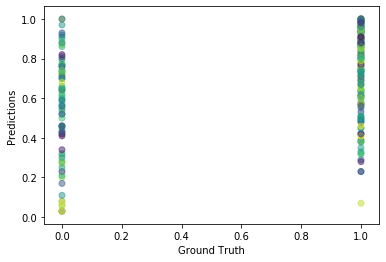

In [46]:
c=np.random.random(len(predictions))
plt.scatter(y_test, predictions,c=c, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();